# Data Preperation

### Importing Necessary Libraries

In [4]:
import os # For directory and file manipulation
import shutil # For high-level file operations like copying and removal
import pandas as pd # For data manipulation and analysis
from tqdm import tqdm # For displaying a progress bar
import rasterio # For working with raster data (e.g., satellite imagery)
from rasterio.plot import show # For displaying raster data
import numpy as np # For numerical operations on arrays
import matplotlib.pyplot as plt # For plotting data and images

In [17]:
# Load the metadata
metadata_df = pd.read_parquet(r'C:\Users\isaac\datasets\2020-BigEarthNet-S2\metadata.parquet')

# Base directories
source_base_dir = r'C:\Users\isaac\datasets\2020-BigEarthNet-S2'
destination_base_dir = r'C:\Users\isaac\datasets\2020-BigEarthNet-S2\BigEarthNetDataset'

### Inspecting the Meta Data

In [20]:
num_rows = metadata_df.shape[0]
print(f"The DataFrame contains {num_rows} rows.")

print()

# Display the column names
print("Column Names:")
print(metadata_df.columns)

print()

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(metadata_df.head())

The DataFrame contains 480038 rows.

Column Names:
Index(['patch_id', 'labels', 'split', 'country', 's1_name', 's2v1_name',
       'contains_seasonal_snow', 'contains_cloud_or_shadow'],
      dtype='object')

First few rows of the DataFrame:
                                            patch_id  \
0  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
1  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
2  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
3  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
4  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   

                                              labels split  country  \
0  [Arable land, Broad-leaved forest, Mixed fores...  test  Austria   
1  [Arable land, Broad-leaved forest, Inland wate...  test  Austria   
2  [Arable land, Broad-leaved forest, Coniferous ...  test  Austria   
3  [Broad-leaved forest, Complex cultivation patt...  test  Austria   
4  [Broad-leaved forest, Complex cultivation patt...  test  Austri

In [21]:
# Extract unique labels from the metadata
unique_labels = metadata_df['labels'].explode().unique()

# Print the unique labels in a numbered table format
print("Unique Labels:")
for i, label in enumerate(unique_labels, start=1):
    print(f"{i}. {label}")

print()

# Create directories for each label with progress bar
for label in tqdm(unique_labels, desc="Creating directories"):
    label_dir = os.path.join(destination_base_dir, label)
    
    # Create the directory if it does not exist
    if not os.path.exists(label_dir):
        os.makedirs(label_dir)

print("All directories have been created.")

Unique Labels:
1. Arable land
2. Broad-leaved forest
3. Mixed forest
4. Pastures
5. Inland waters
6. Coniferous forest
7. Complex cultivation patterns
8. Land principally occupied by agriculture, with significant areas of natural vegetation
9. Urban fabric
10. Industrial or commercial units
11. Inland wetlands
12. Transitional woodland, shrub
13. Natural grassland and sparsely vegetated areas
14. Moors, heathland and sclerophyllous vegetation
15. Marine waters
16. Coastal wetlands
17. Permanent crops
18. Beaches, dunes, sands
19. Agro-forestry areas



Creating directories: 100%|██████████| 19/19 [00:00<00:00, 13704.52it/s]

All directories have been created.


In [ ]:
# Function to process each image
def process_image(image_folder_path, labels):
    try:
        # Process each label
        for label in labels:
            print(label)
            safe_label = label
            print(safe_label)
            dest_dir = os.path.join(destination_base_dir, safe_label)

            # Create the directory if it does not exist
            if not os.path.exists(dest_dir):
                os.makedirs(dest_dir, exist_ok=True)

            # Construct the destination path for each label
            dest_folder_path = os.path.join(dest_dir, os.path.basename(image_folder_path))

            # Check if the destination folder already exists
            if not os.path.exists(dest_folder_path):
                # Copy the folder
                shutil.copytree(image_folder_path, dest_folder_path)
                print(f"Copied {image_folder_path} to {dest_folder_path}")
            else:
                print(f"Folder already exists: {dest_folder_path}")

        # Remove the source directory after copying all the labels
        shutil.rmtree(image_folder_path)
        print(f"Removed {image_folder_path}")
    except Exception as e:
        print(f"Error processing folder {image_folder_path}: {e}")

# Iterate through each date folder
for date_folder in tqdm(os.listdir(source_base_dir), desc="Processing Date Folders"):
    date_folder_path = os.path.join(source_base_dir, date_folder)
    
    if os.path.isdir(date_folder_path):
        # Iterate through each image folder within the date folder
        for image_folder in os.listdir(date_folder_path):
            image_folder_path = os.path.join(date_folder_path, image_folder)
            
            if os.path.isdir(image_folder_path):
                # Find the corresponding metadata row
                patch_id = image_folder
                row = metadata_df[metadata_df['patch_id'] == patch_id]
                
                if not row.empty:
                    labels = row.iloc[0]['labels']
                    process_image(image_folder_path, labels)
                else:
                    print(f"No data found for {patch_id}")

print("Processing complete.")

Processing Date Folders:   0%|          | 0/117 [00:00<?, ?it/s]

No data found for Agro-forestry areas
No data found for Arable land
No data found for Beaches, dunes, sands
No data found for Broad-leaved forest
No data found for Coastal wetlands
No data found for Complex cultivation patterns
No data found for Coniferous forest
No data found for Industrial or commercial units
No data found for Inland waters
No data found for Inland wetlands


Processing Date Folders:   1%|          | 1/117 [00:00<00:44,  2.59it/s]

No data found for Land principally occupied by agriculture, with significant areas of natural vegetation
No data found for Marine waters
No data found for Mixed forest
No data found for Moors, heathland and sclerophyllous vegetation
No data found for Natural grassland and sparsely vegetated areas
No data found for Pastures
No data found for Permanent crops
No data found for Transitional woodland, shrub
No data found for Urban fabric
Arable land
Arable land
Copied C:\Users\isaac\datasets\2020-BigEarthNet-S2\S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP\S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57 to C:\Users\isaac\datasets\2020-BigEarthNet-S2\BigEarthNetDataset\Arable land\S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57
Broad-leaved forest
Broad-leaved forest
Copied C:\Users\isaac\datasets\2020-BigEarthNet-S2\S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP\S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57 to C:\Users\isaac\datasets\2020-BigEarthNet-S2\BigEarthNetDataset\Broad-leav

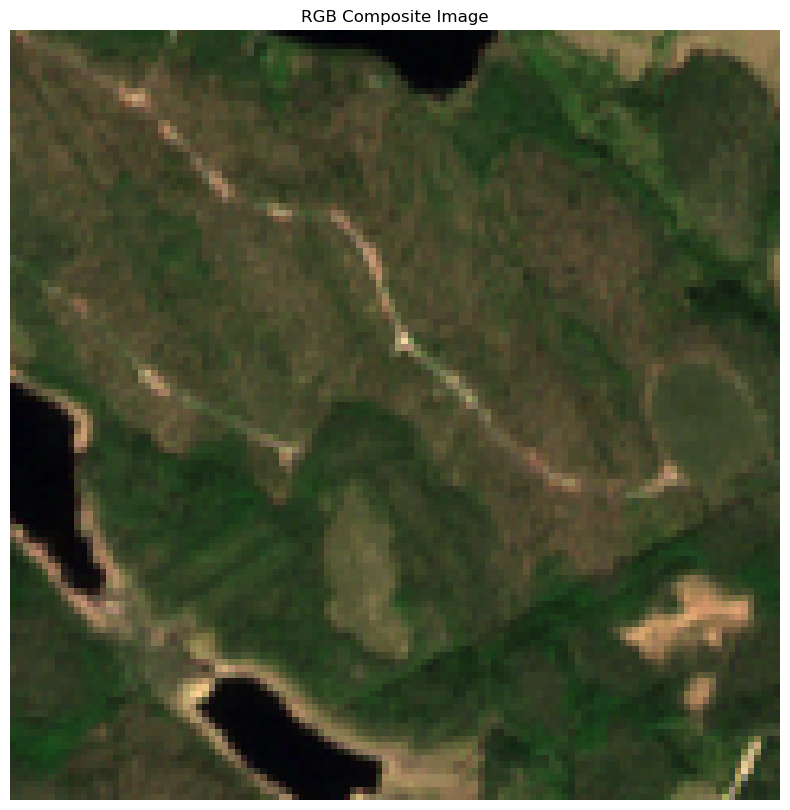

In [18]:
# File paths to the bands (modify these paths to your actual file locations)
band4_path = r'C:\Users\isaac\datasets\2020 - BigEarthNet-S2\BigEarthNetDataset\Coniferous forest\S2B_MSIL2A_20180525T094029_N9999_R036_T35VNK\S2B_MSIL2A_20180525T094029_N9999_R036_T35VNK_78_07_B04.tif'  # Red band
band3_path = r'C:\Users\isaac\datasets\2020 - BigEarthNet-S2\BigEarthNetDataset\Coniferous forest\S2B_MSIL2A_20180525T094029_N9999_R036_T35VNK\S2B_MSIL2A_20180525T094029_N9999_R036_T35VNK_78_07_B03.tif'
band2_path = r'C:\Users\isaac\datasets\2020 - BigEarthNet-S2\BigEarthNetDataset\Coniferous forest\S2B_MSIL2A_20180525T094029_N9999_R036_T35VNK\S2B_MSIL2A_20180525T094029_N9999_R036_T35VNK_78_07_B02.tif'

# Open the bands using Rasterio
with rasterio.open(band4_path) as band4, \
     rasterio.open(band3_path) as band3, \
     rasterio.open(band2_path) as band2:
    
    # Read each band into an array
    red = band4.read(1)
    green = band3.read(1)
    blue = band2.read(1)
    
    # Stack the bands to create an RGB image
    rgb = np.stack((red, green, blue), axis=-1)
    
    # Normalize the bands if necessary (optional)
    rgb = rgb / np.max(rgb)
    
    # Display the RGB image
    plt.figure(figsize=(10, 10))
    plt.imshow(rgb)
    plt.title("RGB Composite Image")
    plt.axis('off')
    plt.show()


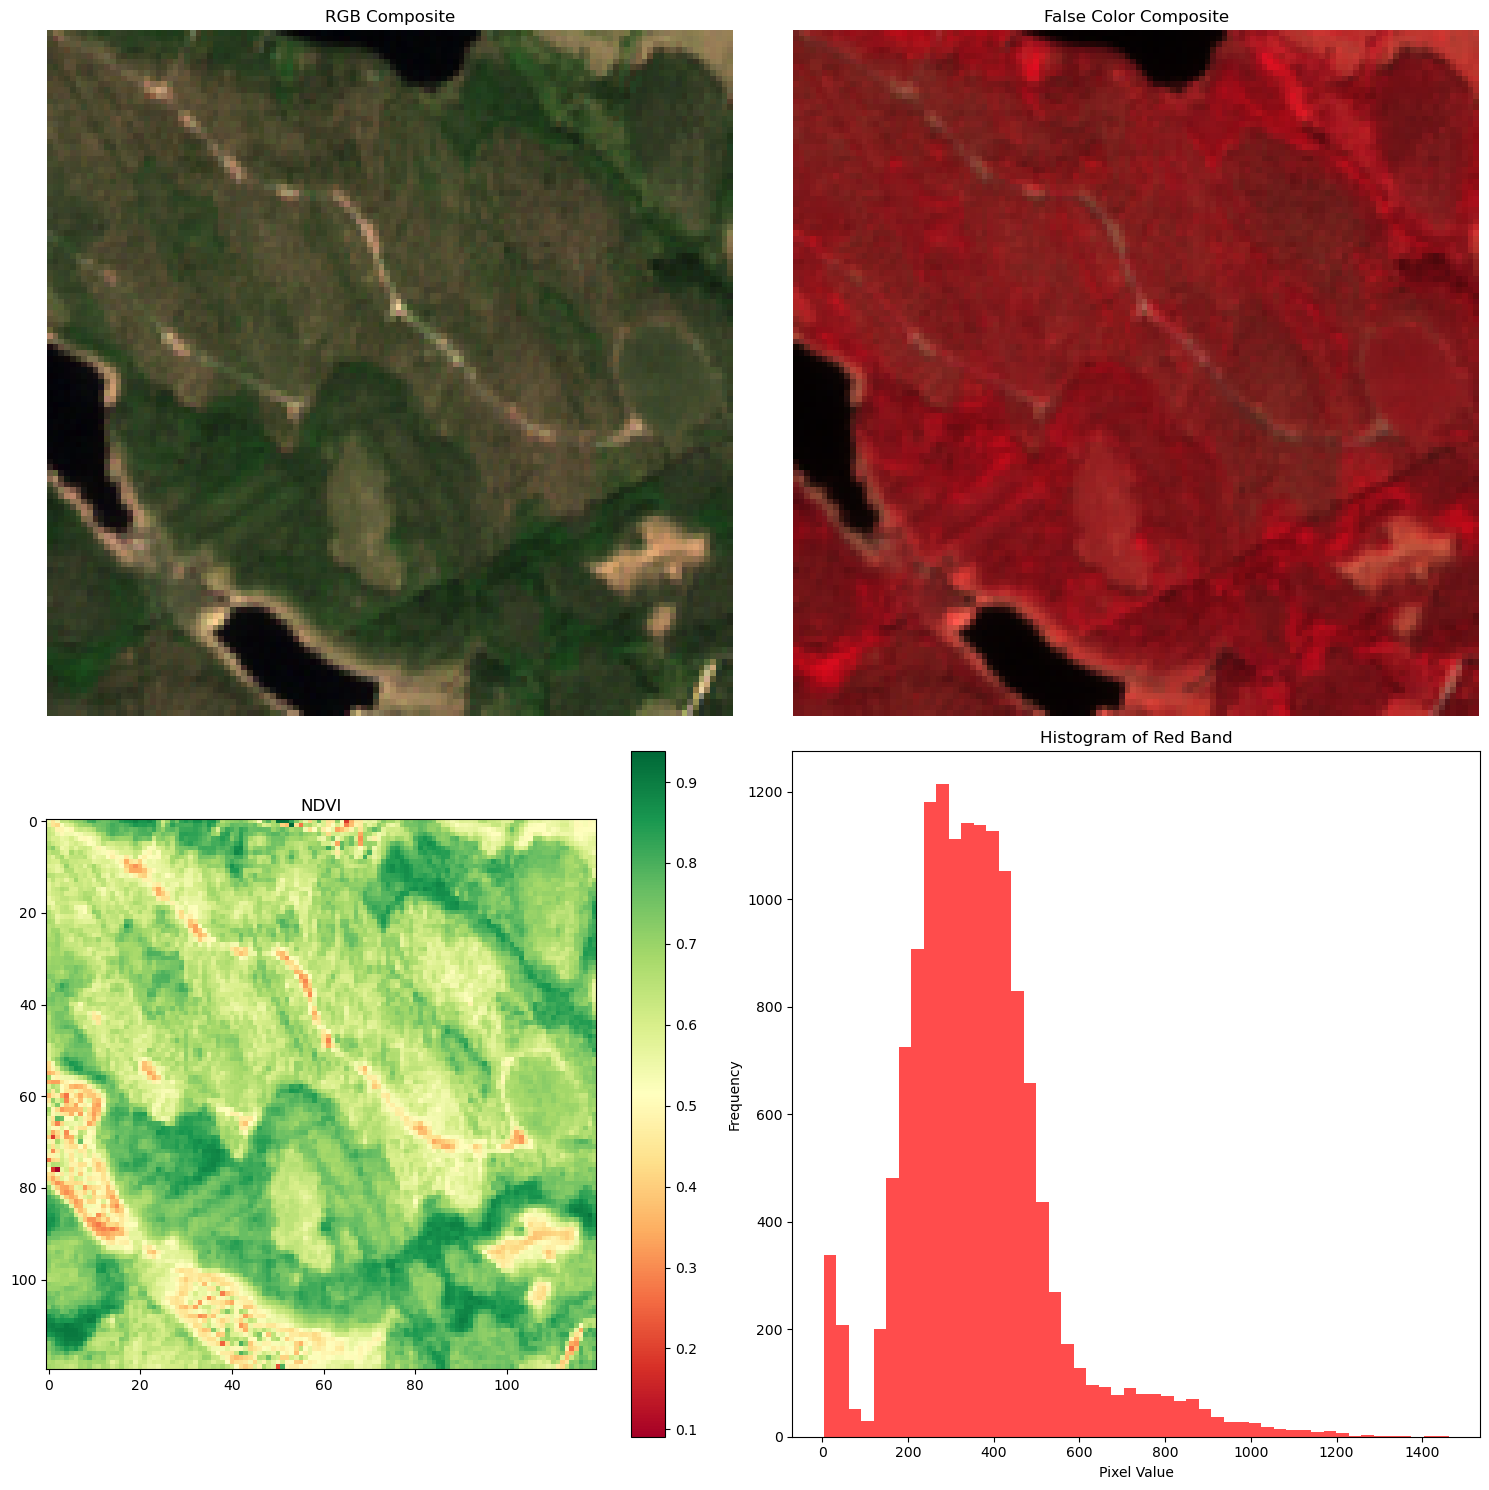

In [19]:
# File paths to the bands
band4_path = r'C:\Users\isaac\datasets\2020 - BigEarthNet-S2\BigEarthNetDataset\Coniferous forest\S2B_MSIL2A_20180525T094029_N9999_R036_T35VNK\S2B_MSIL2A_20180525T094029_N9999_R036_T35VNK_78_07_B04.tif'  # Red band
band3_path = r'C:\Users\isaac\datasets\2020 - BigEarthNet-S2\BigEarthNetDataset\Coniferous forest\S2B_MSIL2A_20180525T094029_N9999_R036_T35VNK\S2B_MSIL2A_20180525T094029_N9999_R036_T35VNK_78_07_B03.tif'  # Green band
band2_path = r'C:\Users\isaac\datasets\2020 - BigEarthNet-S2\BigEarthNetDataset\Coniferous forest\S2B_MSIL2A_20180525T094029_N9999_R036_T35VNK\S2B_MSIL2A_20180525T094029_N9999_R036_T35VNK_78_07_B02.tif'  # Blue band
nir_path = r'C:\Users\isaac\datasets\2020 - BigEarthNet-S2\BigEarthNetDataset\Coniferous forest\S2B_MSIL2A_20180525T094029_N9999_R036_T35VNK\S2B_MSIL2A_20180525T094029_N9999_R036_T35VNK_78_07_B08.tif'  # NIR band

# Open the bands using Rasterio
with rasterio.open(band4_path) as band4, \
     rasterio.open(band3_path) as band3, \
     rasterio.open(band2_path) as band2, \
     rasterio.open(nir_path) as nir_band:
    
    red = band4.read(1)
    green = band3.read(1)
    blue = band2.read(1)
    nir = nir_band.read(1)
    
    # RGB Composite
    rgb = np.stack((red, green, blue), axis=-1)
    rgb = rgb / np.max(rgb)
    
    # False Color Composite (NIR, Red, Green)
    false_color = np.stack((nir, red, green), axis=-1)
    false_color = false_color / np.max(false_color)
    
    # NDVI
    ndvi = (nir - red) / (nir + red)
    
    # Display results
    plt.figure(figsize=(15, 15))

    plt.subplot(2, 2, 1)
    plt.imshow(rgb)
    plt.title("RGB Composite")
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(false_color)
    plt.title("False Color Composite")
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(ndvi, cmap='RdYlGn')
    plt.title("NDVI")
    plt.colorbar()

    plt.subplot(2, 2, 4)
    plt.hist(red.ravel(), bins=50, color='red', alpha=0.7)
    plt.title("Histogram of Red Band")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()


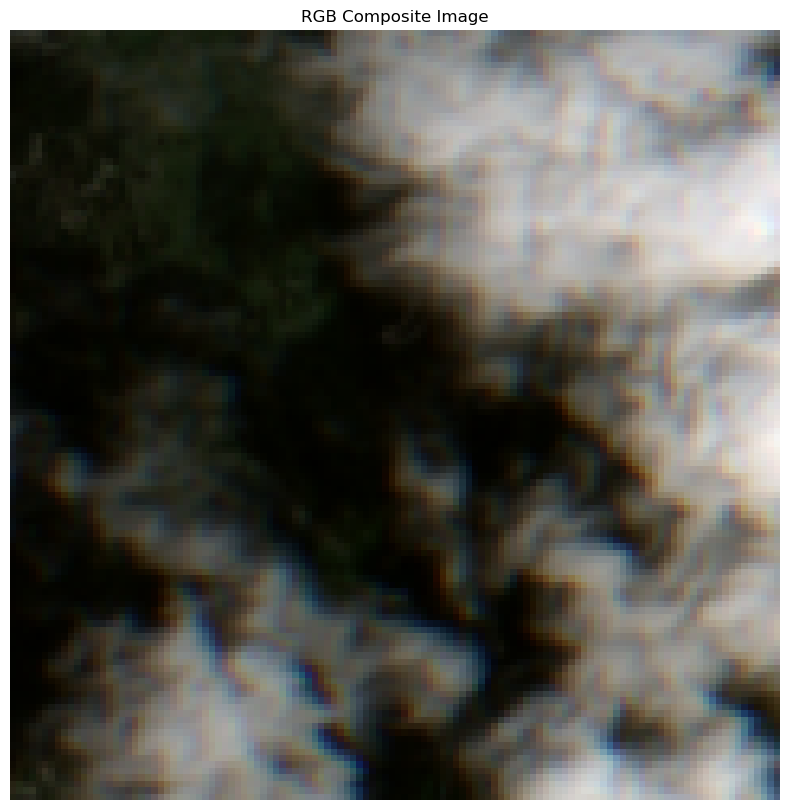

In [44]:
# File paths to the bands (modify these paths to your actual file locations)
band4_path = r'C:\Users\isaac\Desktop\S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_87_87_B04.tif'  # Red band
band3_path = r'C:\Users\isaac\Desktop\S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_87_87_B03.tif'
band2_path = r'C:\Users\isaac\Desktop\S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_87_87_B02.tif'

# Open the bands using Rasterio
with rasterio.open(band4_path) as band4, \
     rasterio.open(band3_path) as band3, \
     rasterio.open(band2_path) as band2:
    
    # Read each band into an array
    red = band4.read(1)
    green = band3.read(1)
    blue = band2.read(1)
    
    # Stack the bands to create an RGB image
    rgb = np.stack((red, green, blue), axis=-1)
    
    # Normalize the bands if necessary (optional)
    rgb = rgb / np.max(rgb)
    
    # Display the RGB image
    plt.figure(figsize=(10, 10))
    plt.imshow(rgb)
    plt.title("RGB Composite Image")
    plt.axis('off')
    plt.show()


In [11]:
# Define the patch_id you're interested in
target_patch_id = 'S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57'  # Replace with your specific patch_id

# Filter the DataFrame to get the row with the matching patch_id
matching_row = metadata_df.loc[metadata_df['patch_id'] == target_patch_id]

# If a match is found, extract the labels
if not matching_row.empty:
    labels = matching_row['labels'].values[0]
    print(f'Labels for patch_id {target_patch_id}: {labels}')
else:
    print(f'No matching patch_id found for {target_patch_id}')


Labels for patch_id S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57: ['Arable land' 'Broad-leaved forest' 'Mixed forest' 'Pastures']


In [12]:
# Define the patch_id you're interested in
target_patch_id = 'S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_27_55'  # Replace with your specific patch_id

# Filter the DataFrame to get the row with the matching patch_id
matching_row = metadata_df.loc[metadata_df['patch_id'] == target_patch_id]

# If a match is found, extract the labels
if not matching_row.empty:
    labels = matching_row['labels'].values[0]
    print(f'Labels for patch_id {target_patch_id}: {labels}')
else:
    print(f'No matching patch_id found for {target_patch_id}')

Labels for patch_id S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_27_55: ['Arable land' 'Broad-leaved forest' 'Inland waters' 'Mixed forest']


In [7]:
import pandas as pd

# Load the meta data
metadata_df = pd.read_parquet(r'C:\Users\isaac\datasets\2020 - BigEarthNet-S2\metadata.parquet')

# Print the number of rows
print(f"Number of rows in the DataFrame: {metadata_df.shape[0]}")

Number of rows in the DataFrame: 480038
